---
INF2178 Midterm Code Submission - Group 16
*   Rongjia Bao
*   Xiaozhou (Andy) Ye

https://colab.research.google.com/drive/1Yk0OXL1wc80uuA-Ch4FIkGGxIe1JpP02?usp=sharing
---

Data Import and Cleaning

In [ ]:
# Load useful packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot

In [ ]:
# Define a function for data cleaning
def cleandata(filename):
  """Take in csv file name in the format 'file_name.csv', change categorical
  variable columns and binary ordinal variable into string type, and return
  cleaned dataframe.
  """
  # Load data
  df = pd.read_csv(filename)
  # Change categorical variables to string type
  df[['Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_', \
      'Youth_at_arrest__under_18_years', 'ArrestLocDiv', \
      'Occurrence_Category']] = \
      df[['Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_', \
          'Youth_at_arrest__under_18_years', 'ArrestLocDiv', \
          'Occurrence_Category']].astype('string')
  # Omit rows where sex is not female or male
  df = df[df['Sex'] != 'U']
  # Modify youth column to either youth or not a your
  df.loc[df['Youth_at_arrest__under_18_years'] != 'Not a youth', \
         'Youth_at_arrest__under_18_years'] = 'Youth'
  # Combine two similar categories for age group into one
  df.loc[df['Age_group__at_arrest_'] == 'Aged 17 years and younger',\
         'Age_group__at_arrest_'] = 'Aged 17 years and under'
  df.loc[df['Age_group__at_arrest_'] == 'Aged 65 and older',\
         'Age_group__at_arrest_'] = 'Aged 65 years and older'
  # When one is strip searched, he/she must be booked at the station
  df.loc[df['StripSearch'] == 1, 'Booked'] = 1
  return df
# Import the data
df = cleandata('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

# Group the dataset by Year, Race, and Age and calculate the number of
# StripSearch and Arrest
data = df.groupby(['Arrest_Year', 'Perceived_Race', \
                   'Sex', 'Age_group__at_arrest_', \
                   'Youth_at_arrest__under_18_years'], \
                  as_index=False)['StripSearch'].sum()
data['Arrest'] = list(df.groupby(['Arrest_Year', 'Perceived_Race', \
                                  'Sex', 'Age_group__at_arrest_', \
                                  'Youth_at_arrest__under_18_years']).size())
# Simplify the column names
data.rename(columns = {'Arrest_Year': 'Year', 'Perceived_Race': 'Race',
                       'Age_group__at_arrest_': 'AgeGroup',
                       'Youth_at_arrest__under_18_years': 'Youth'},
            inplace = True)

# Add the missing group
newrow = {'Year': 2020,
          'Race': 'Latino',
          'Sex': 'F',
          'AgeGroup': 'Aged 55 to 64 years',
          'Youth': 'Not a youth',
          'StripSearch': 0,
          'Arrest': 0}
data = data.append(newrow, ignore_index = True)

Exploratory Data Analysis

In [ ]:
# Describe data
data.head()

Text(44.59234375, 0.5, 'Portion of people strip searched')

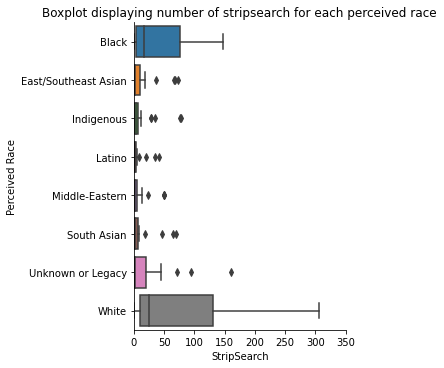

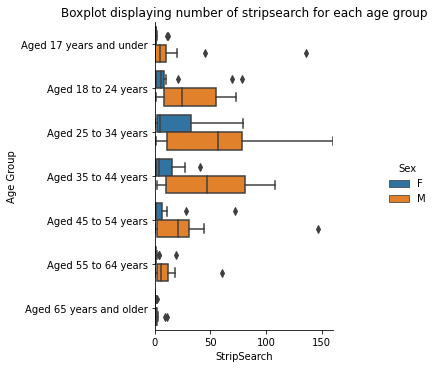

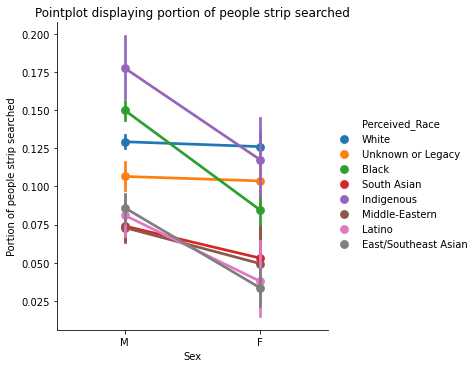

In [ ]:
# Barplot of number of arrests between different races, grouped by sex
#sns.catplot(data = df, y = 'Perceived_Race', kind = 'count', hue = 'Sex')
#plt.title('Barplot displaying number of arrests for each perceived race')
#plt.xlabel('Number of arrests')

# Boxplot of number of stripsearch between races
sns.catplot(data=data, y = "Race", x = "StripSearch", kind="box")
plt.xlim(0, 350)
plt.title('Boxplot displaying number of stripsearch for each perceived race')
plt.ylabel('Perceived Race')

# Boxplot of number of stripsearch between age groups
sns.catplot(data=data, y = "AgeGroup", x = "StripSearch", hue = 'Sex', kind="box")
plt.xlim(0, 160)
plt.title('Boxplot displaying number of stripsearch for each age group')
plt.ylabel('Age Group')

# Barplot of number of arrests in each quarter
#sns.catplot(data = df, y = 'Arrest_Month', kind = 'count')
#plt.title('Barplot displaying number of arrests in each quarter')
#plt.xlabel('Number of arrests')
#plt.ylabel('Quarters of the year')

# Pointplot of percentage of people strip searched
sns.catplot(data = df, x = 'Sex', y = 'StripSearch', kind = 'point',
            hue = 'Perceived_Race')
plt.title('Pointplot displaying portion of people strip searched')
plt.xlabel('Sex')
plt.ylabel('Portion of people strip searched')

# Barplot of number of arrests in different age group
#sns.catplot(data = df, y = 'Age_group__at_arrest_', kind = 'count')
#plt.title('Barplot displaying number of arrests in different age group')
#plt.xlabel('Number of arrests')
#plt.ylabel('Age Group')


T-Test

In [ ]:
# t-test for number of strip searched among different gender
m = data[data['Sex'] == 'M']['StripSearch']
f = data[data['Sex'] == 'F']['StripSearch']
stats.ttest_ind(a=m, b=f, equal_var=True)

Ttest_indResult(statistic=3.291611631656379, pvalue=0.0011587995017533778)

In [ ]:
# t-test for number of arrests among different gender
m = data[data['Sex'] == 'M']['Arrest']
f = data[data['Sex'] == 'F']['Arrest']
stats.ttest_ind(a=m, b=f, equal_var=True)

Ttest_indResult(statistic=5.13360490086564, pvalue=6.203746418421583e-07)

In [ ]:
# t-test for number of strip searched betweem 2020 and 2021
year20 = data[data['Year'] == 2020]['StripSearch']
year21 = data[data['Year'] == 2021]['StripSearch']
stats.ttest_ind(a=year20, b=year21, equal_var=True)

Ttest_indResult(statistic=4.093600424660075, pvalue=5.9481106288335435e-05)

In [ ]:
# t-test for number of arrests betweem 2020 and 2021
year20 = data[data['Year'] == 2020]['Arrest']
year21 = data[data['Year'] == 2021]['Arrest']
stats.ttest_ind(a=year20, b=year21, equal_var=True)

Ttest_indResult(statistic=-0.15996450303340357, pvalue=0.8730544876686925)

In [ ]:
# t-test for number of strip searched among different youth
youth = data[data['Youth'] == 'Youth']['StripSearch']
notYouth = data[data['Youth'] == 'Not a youth']['StripSearch']
stats.ttest_ind(a=youth, b=notYouth, equal_var=True)

Ttest_indResult(statistic=-1.4711995430314846, pvalue=0.14265320107492713)

In [ ]:
# t-test for number of arrests among different youth
youth = data[data['Youth'] == 'Youth']['Arrest']
notYouth = data[data['Youth'] == 'Not a youth']['Arrest']
stats.ttest_ind(a=youth, b=notYouth, equal_var=True)

Ttest_indResult(statistic=-2.1992148890862286, pvalue=0.028894814979940328)

In [ ]:
# t-test for number of strip searched among Black and non Black
blackUnknown = data.loc[data['Race'].isin(['Black', 'Unknown or Legacy'])]['StripSearch']
nonBlack = data.loc[data['Race'].isin(['South Asian', 'Latino','White','Indigenous','Middle-Eastern','East/Southeast Asian'])]['StripSearch']
stats.ttest_ind(a=blackUnknown, b=nonBlack, equal_var=True)

Ttest_indResult(statistic=1.45339427851965, pvalue=0.14752644059038528)

ANOVA

In [ ]:
# One-way ANOVA for race
model = ols('StripSearch ~ C(Race)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [ ]:
# Tukey's test
score = list(data[data['Race'] == 'South Asian']['StripSearch']) + \
list(data[data['Race'] == 'Latino']['StripSearch']) + \
list(data[data['Race'] == 'Unknown or Legacy']['StripSearch']) + \
list(data[data['Race'] == 'Black']['StripSearch']) + \
list(data[data['Race'] == 'White']['StripSearch']) + \
list(data[data['Race'] == 'Indigenous']['StripSearch']) + \
list(data[data['Race'] == 'Middle-Eastern']['StripSearch']) + \
list(data[data['Race'] == 'East/Southeast Asian']['StripSearch'])

group = ['South Asian', 'Latino', 'Unknown or Legacy', 'Black', 'White',\
         'Indigenous', 'Middle-Eastern', 'East.Southeast Asian']

df = pd.DataFrame({'score': score,
                   'group': np.repeat(group, repeats = 28)})

# Perform Tukey's test
tukey = pairwise_tukeyhsd(endog = df['score'],
                          groups = df['group'],
                          alpha=0.05)

# Display results
print(tukey)

In [ ]:
# Two-way ANOVA for Sex and AgeGroup
model = ols('StripSearch ~ C(Sex) + C(AgeGroup) + C(Sex):C(AgeGroup)', data=data).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
# Plot interaction
fig = interaction_plot(x = data['AgeGroup'], trace = data['Sex'],
                       response = data['StripSearch'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Age Group')
plt.show()